Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 4, 10, 1, 3, 8, 1, 13, 5, 5, 6, 11, 7, …
$ Glucose                  <dbl> 85, 89, 110, 139, 103, 126, 99, 97, 145, 117,…
$ BloodPressure            <dbl> 66, 66, 92, 80, 30, 88, 84, 66, 82, 92, 75, 9…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 15, 19, 0, 26, 0, 0,…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 140, 110, 0, 0, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 37.6, 27.1, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.191, 1.441, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 30, 57, 33, 27, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The suitable outcome in the logistic regression model is the diabetes_train as it will be used as a binary variable

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

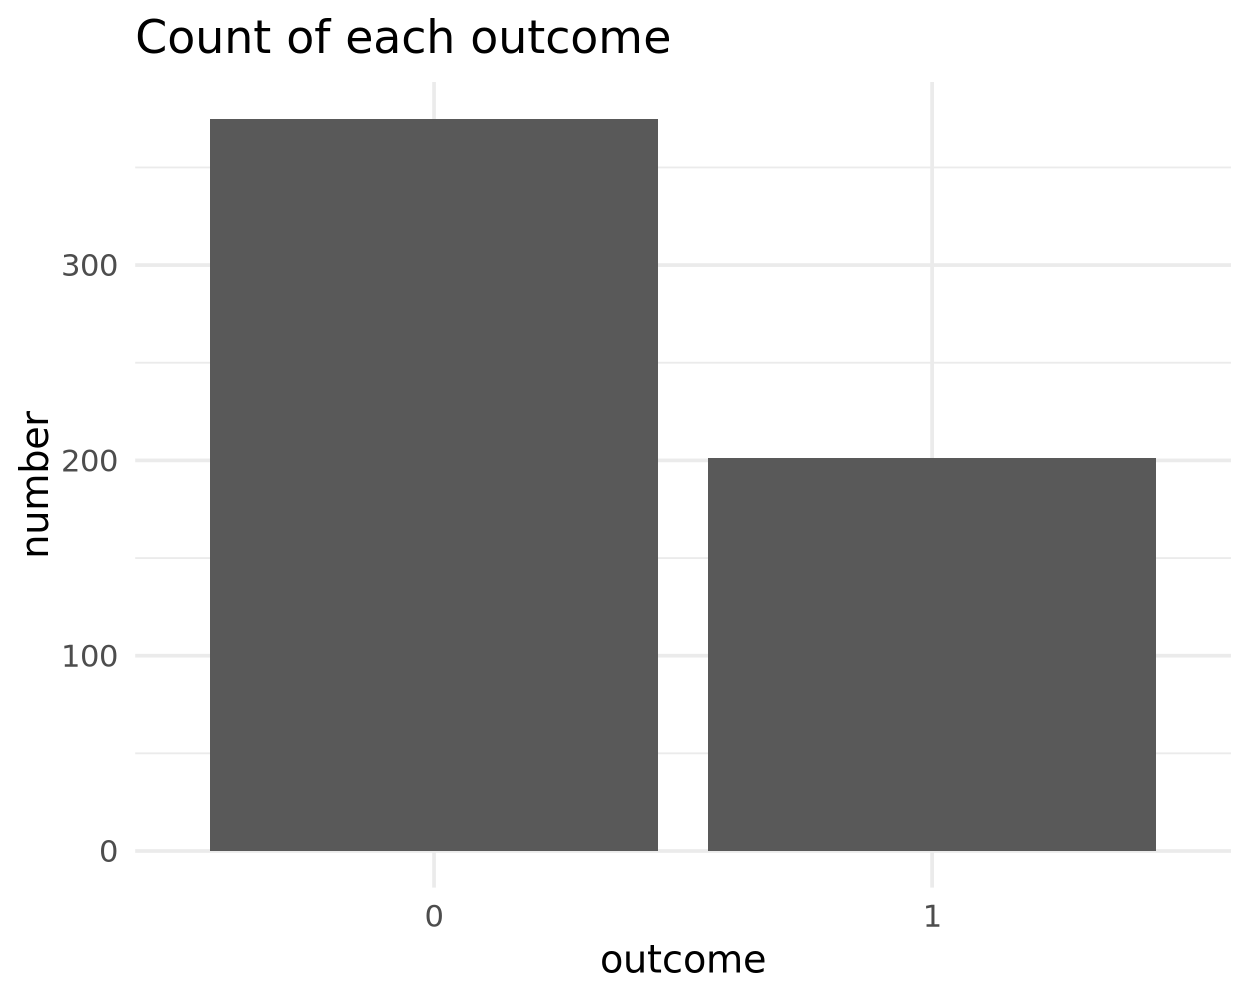

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar() +
  theme_minimal() +
  labs(title = "Count of each outcome", x = "outcome", y = "number")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced and we do not have an equal count for each outcome


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

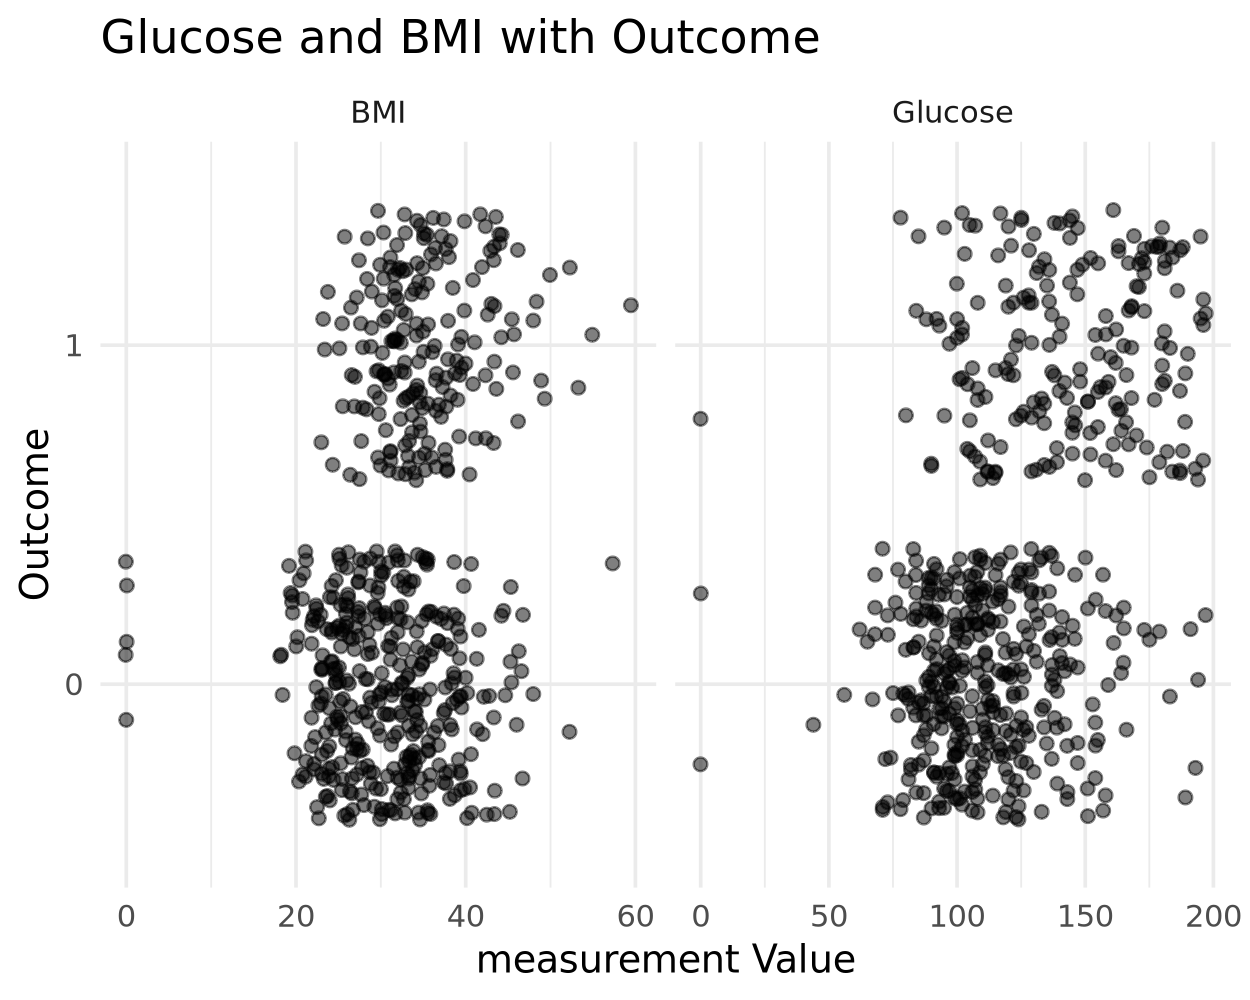

In [6]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(alpha = 0.5, width = 0.1) +  
  facet_wrap(~name, ncol = 2, scales = 'free_x') +  
  labs(title = "Glucose and BMI with Outcome",
       x = "measurement Value",
       y = "Outcome") +
  theme_minimal()



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

By removing the `scales = 'free_x'` argument from the `facet_wrap` function it means all of the subpots 
will use the same x scale

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [7]:
body <- glm(Outcome ~ BMI + Glucose, family = binomial(link = "logit"), data = diabetes_train)
summary(body)


Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial(link = "logit"), 
    data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.861681   0.724416 -10.852  < 2e-16 ***
BMI          0.082851   0.016063   5.158  2.5e-07 ***
Glucose      0.035786   0.003747   9.550  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 569.51  on 573  degrees of freedom
AIC: 575.51

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [8]:
diabetes_test_wPred <- augment(body, newdata = diabetes_test)

head(diabetes_test_wPred)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.fitted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
5,116,74,0,0,25.6,0.201,30,0,-1.5895529
10,115,0,0,0,35.3,0.134,29,0,-0.8216852
2,197,70,45,543,30.5,0.158,53,1,1.7150614
8,125,96,0,0,0.0,0.232,54,1,-3.3884636
1,189,60,23,846,30.1,0.398,59,1,1.3956351
7,100,0,0,0,30.0,0.484,32,1,-1.7975809


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [9]:
# used chatgpt for help kept getting a conf error

In [10]:
mod_fit <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial())

diabetes_test_wPred <- augment(mod_fit, newdata = diabetes_test)

diabetes_test_wPred$.pred_class <- ifelse(diabetes_test_wPred$.fitted >= 0.5, 1, 0)


diabetes_test_wPred$.pred_class <- factor(diabetes_test_wPred$.pred_class, levels = c(0, 1))


conf_matrix <- conf_mat(data = diabetes_test_wPred, truth = Outcome, estimate = .pred_class)


print(conf_matrix)

          Truth
Prediction   0   1
         0 118  46
         1   7  21


❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

Out of the 67 individuals who had diabetes, only 26 were correctly identified by the model. Additionally, the model inaccurately predicted diabetes in 7 cases where it was not present.